In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.special import factorial

### Simple Harmonic Oscillator

![SHO](https://upload.wikimedia.org/wikipedia/commons/e/ea/Simple_Harmonic_Motion_Orbit.gif)

In [6]:
#time-step
dt = 0.05

In [7]:
#total time = n*dt
n = 1000

In [8]:
#defining numpy array to store position (dependent variable) and time (independent variable)
x = np.zeros((n,), dtype=float)
t = np.zeros((n,), dtype=float)

In [9]:
## Initial conditions
x0 = 0.
v0 = 1.

# Assuming k and m to be 1.
k = 1.0
m = 1.0

#### Homework: 
1. Try your own version of solving SHO using Verlet Algorithm by assuming some finite value of mass (m) and spring constant (k) in their proper units
2. Try to play with different input parameters (dt k, m) and see how senstive your solution x(t) is to the input parameters? 
3. Always choose initial conditions sensibility
4. Try to plot momentum vs position (p vs. x) also called as phase space diagram? 

In [185]:
#Define a python function to calculate the exact (analytical) solution for x(t)
def analytical_SHO(t,x0,v0,k,m):
    return x0*np.cos(np.sqrt(k/m)*t) + (v0/(np.sqrt(k/m)))*np.sin(np.sqrt(k/m)*t)

In [186]:
#Updating time
t[0] = 0
t[1] = dt

for i in range(2,n):
    t[i] = i*dt

In [187]:
x_analytical = analytical_SHO(t,x0,v0,k,m)

In [188]:
#Verlet: x(t+dt) = x(t)*(2-(k/m)*dt**2) - x(t-dt) 
#t=i*dt

#Estimating previous two positions for Verlet from analytical solution
x[0] = x_analytical[0] 
x[1] = x_analytical[1]

#updating position
for i in range(2,n):
    x[i]=x[i-1]*(2.0 - (k/m)*dt**2) - x[i-2]

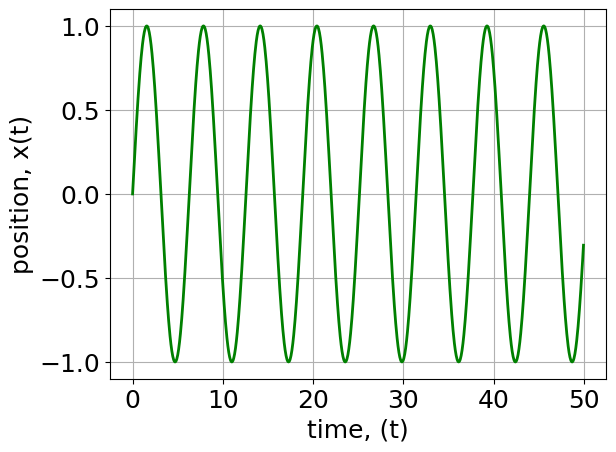

In [189]:
plt.rc("font", size=18)
fig, ax = plt.subplots()

#plot
ax.plot(t,x, 'g-', linewidth=2)

# ax.set_xlim(-1.0,t[-1]+1.0)
# ax.set_ylim(np.min(x)-0.01,np.max(x)+0.01)

ax.set_xlabel('time, (t)')
ax.set_ylabel('position, x(t)')

ax.grid(True)

plt.show()

In [190]:
##Verlet: x(t+dt) = x(t)*(2-(k/m)*dt**2) - x(t-dt) 
##t=i*dt

##velocity = x(t+dt)-x(t-dt)/(2*dt)

v = np.zeros((n),dtype=float)

#Calculating initial velocities (are these good choices?)
v[0] = x[1]/dt
v[1] = (x[2]-x[0])/(2*dt)

#updating position
for j in range(2,n-1):
    v[j]=(x[j+1]-x[j-1])/(2*dt)

NameError: name 'v' is not defined

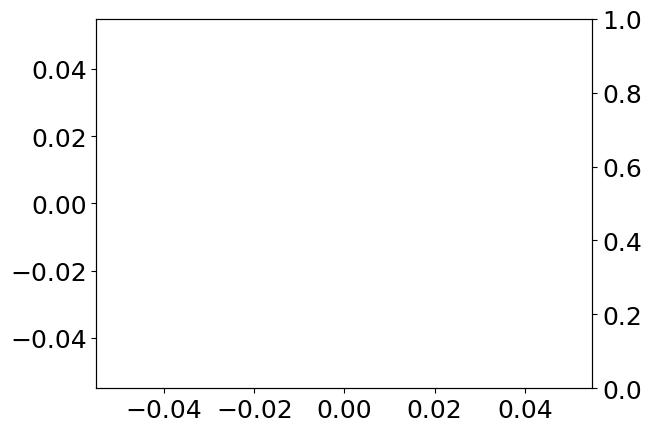

In [11]:
plt.rc("font", size=18)
fig, ax = plt.subplots()

#plot-position
ax.plot(t,x, 'g-', linewidth=2)

ax2 = ax.twinx()

#plot-velocity
ax2.plot(t[:-1],v[:-1], 'b-', linewidth=2)

#ax.set_xlim(-1.0,t[-1]+1.0)
# ax.set_ylim(-0.1, 0.1)
# ax2.set_ylim(-0.1,0.1)

ax.set_xlabel('time, (t)')
ax.set_ylabel('position, x(t)',color='g')
ax2.set_ylabel('velocity, v(t)',color='b')

ax.grid(True)

plt.show()

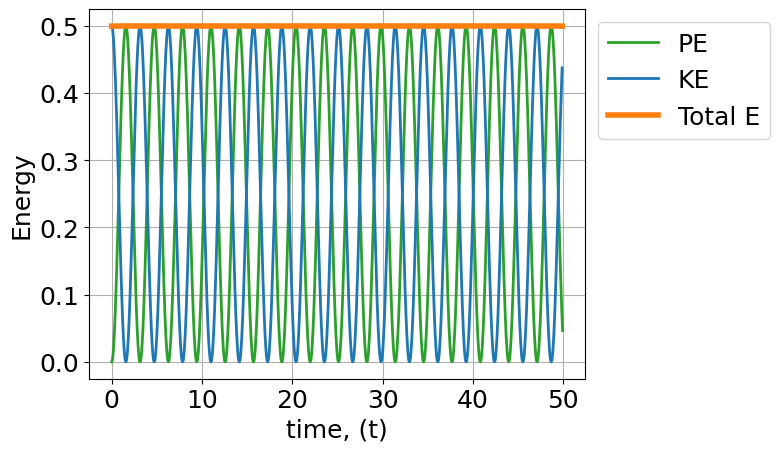

In [192]:
## Kinetic energy (KE) = 1/2*m*v(t)**2
## Potential energy (PE) = 1/2*k*x(t)**2
## Total energ = KE + PE

plt.rc("font", size=18)
fig, ax = plt.subplots()

#plot-potential energy
ax.plot(t,1/2*k*x**2, 'tab:green', linewidth=2, label='PE')

#plot-kinetic energy
ax.plot(t[:-1],1/2*m*v[:-1]**2, 'tab:blue', linewidth=2, label='KE')

#plot-total energy
ax.plot(t[:-1],(1/2*m*v[:-1]**2)+(1/2*k*x[:-1]**2), 'tab:orange', linewidth=4, label='Total E')

#ax.set_xlim(-1.0,t[-1]+1.0)
#ax.set_ylim(-0.0005, 0.0025)
# ax2.set_ylim(-0.1,0.1)

ax.set_xlabel('time, (t)')
ax.set_ylabel('Energy',color='k')
#ax2.set_ylabel('Kinetic Energy',color='tab:purple')

ax.grid(True)
ax.legend(bbox_to_anchor=(1, 1))

plt.show()

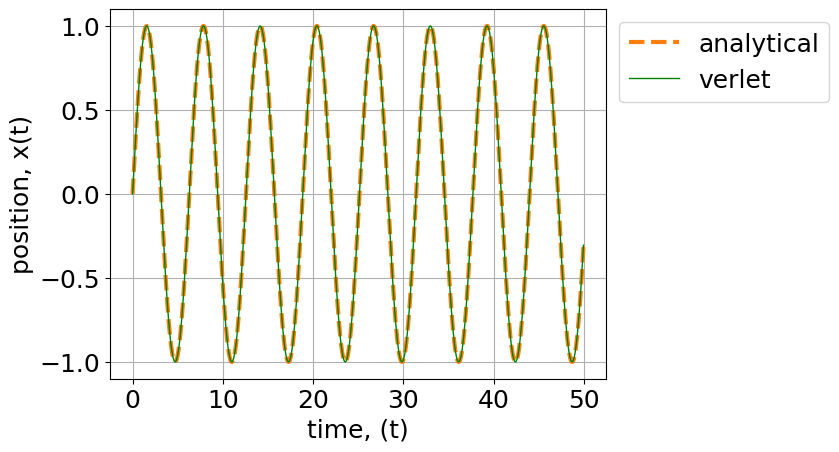

In [193]:
plt.rc("font", size=18)
fig, ax = plt.subplots()

#plot_analytical
ax.plot(t,x_analytical, color='tab:orange', linewidth=3, linestyle='--', label='analytical')

#plot-verlet
ax.plot(t,x, color='g', linewidth=1, linestyle='-', label='verlet')

# ax.set_xlim(0.,np.max(t[:100]))
# ax.set_ylim(np.min(x)-0.01,np.max(x)+0.01)

ax.set_xlabel('time, (t)')
ax.set_ylabel('position, x(t)')

ax.grid(True)
ax.legend(bbox_to_anchor=(1, 1))

plt.show()

In [194]:
error1 = x_analytical-x

In [195]:
data = np.column_stack((t, x, x_analytical, error1))
colvals = ['time', 'x_verlet', 'x_analytical', 'diff']

In [196]:
pd.DataFrame(data, columns=colvals).round(8)

,time,x_verlet,x_analytical,diff
0,0.00,0.000000,0.000000,0.000000e+00
1,0.05,0.049979,0.049979,0.000000e+00
2,0.10,0.099833,0.099833,3.000000e-08
3,0.15,0.149438,0.149438,1.000000e-07
4,0.20,0.198669,0.198669,2.600000e-07
...,...,...,...,...
995,49.75,-0.488387,-0.492955,-4.567600e-03
996,49.80,-0.444165,-0.448854,-4.689140e-03
997,49.85,-0.398832,-0.403631,-4.799200e-03
998,49.90,-0.352502,-0.357400,-4.897480e-03


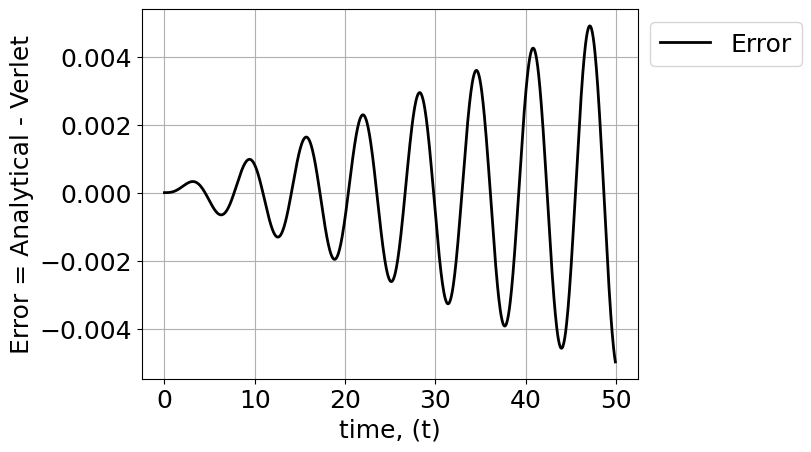

In [197]:
plt.rc("font", size=18)
fig, ax = plt.subplots()

#plot_analytical
ax.plot(t,error1, color='k', linewidth=2, linestyle='-', label='Error')

ax.set_xlabel('time, (t)')
ax.set_ylabel('Error = Analytical - Verlet')

# ax.set_ylim(-0.1,0.1)
# ax.set_ylim(-1.,1.)

ax.grid(True)
ax.legend(bbox_to_anchor=(1, 1))

plt.show()

#### Can we modify x to include higher order taylor expansion terms? Will this help us reduce the error?

In [198]:
## New position variable x2(t)
x2 = np.zeros((n,), dtype=float)

In [199]:
#Include higher order term in Verlet
fac2 = (2.0 - (k/m)*dt**2 + ((k/m)**2*dt**4)/12)

In [200]:
#Verlet: x(t+dt) = x(t)*(2-(k/m)*dt**2) - x(t-dt) 
#t=i*dt

#initial conditions
x2[0] = x_analytical[0]
x2[1] = x_analytical[1]

#updating position
for i in range(2,n):
    x2[i]=x2[i-1]*fac2 - x2[i-2]

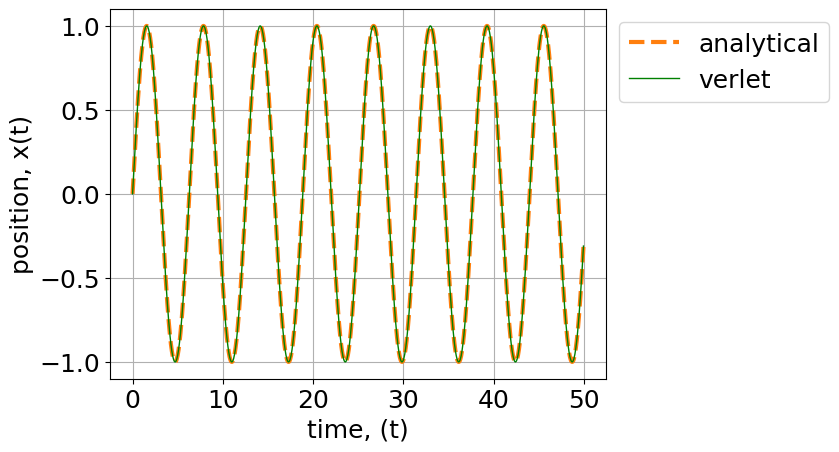

In [201]:
plt.rc("font", size=18)
fig, ax = plt.subplots()

#plot_analytical
ax.plot(t,x_analytical, color='tab:orange', linewidth=3, linestyle='--', label='analytical')

#plot-verlet
ax.plot(t,x2, color='g', linewidth=1, linestyle='-', label='verlet')

# ax.set_xlim(0.,np.max(t[:100]))
# ax.set_ylim(np.min(x)-0.01,np.max(x)+0.01)

ax.set_xlabel('time, (t)')
ax.set_ylabel('position, x(t)')

ax.grid(True)
ax.legend(bbox_to_anchor=(1, 1))

plt.show()

In [202]:
error2 = x_analytical-x2

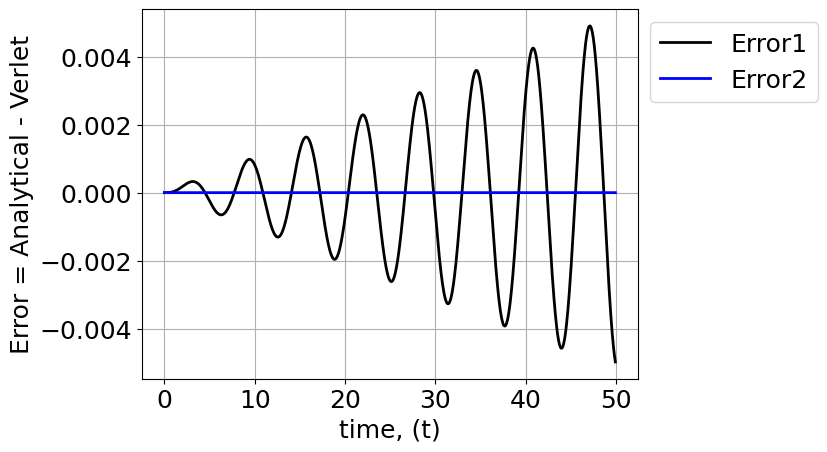

In [206]:
plt.rc("font", size=18)
fig, ax = plt.subplots()

# #plot_analytical
ax.plot(t,error1, color='k', linewidth=2, linestyle='-', label='Error1')
ax.plot(t,error2, color='b', linewidth=2, linestyle='-', label='Error2')

ax.set_xlabel('time, (t)')
ax.set_ylabel('Error = Analytical - Verlet')

# ax.set_ylim(-0.001,0.001)
# ax.set_ylim(-1.,1.)

ax.grid(True)
ax.legend(bbox_to_anchor=(1, 1))

plt.show()

In [204]:
data = np.column_stack((t, x, x_analytical, error1, error2))
colvals = ['time', 'x_verlet', 'x_analytical', 'error1', 'error2']

In [205]:
pd.DataFrame(data, columns=colvals).round(8)

,time,x_verlet,x_analytical,error1,error2
0,0.00,0.000000,0.000000,0.000000e+00,0.000000e+00
1,0.05,0.049979,0.049979,0.000000e+00,0.000000e+00
2,0.10,0.099833,0.099833,3.000000e-08,-0.000000e+00
3,0.15,0.149438,0.149438,1.000000e-07,-0.000000e+00
4,0.20,0.198669,0.198669,2.600000e-07,-0.000000e+00
...,...,...,...,...,...
995,49.75,-0.488387,-0.492955,-4.567600e-03,3.800000e-07
996,49.80,-0.444165,-0.448854,-4.689140e-03,3.900000e-07
997,49.85,-0.398832,-0.403631,-4.799200e-03,4.000000e-07
998,49.90,-0.352502,-0.357400,-4.897480e-03,4.100000e-07


#### Homework
1. What is a leap-frog algorith? 
2. Can you implement the leap-from algorithm to solve for the position x(t) of SHO?
3. How about using the just the first three term of taylor expansion instead of Verlet and Leap-frog algorithm? 